In [ ]:
#MAJOR PROJECT 2

#Choose any dataset of your choice and apply K Means Clustering

In [ ]:
#DATASET-CORRUPTION
#URL-/content/corruption (1).csv

In [ ]:
#Create DataFrame
import pandas as pd
df=pd.read_csv('/content/corruption (1).csv')
df

,country,annual_income,corruption_index
0,Denmark,68110,12
1,Finland,53660,12
2,New Zealand,45340,12
3,Norway,84090,15
4,Singapore,64010,15
...,...,...,...
105,Yemen,670,84
106,Venezuela,13080,86
107,Somalia,450,87
108,Syria,1170,87


In [ ]:
df.shape 
#Rows=110
#Columns=3

(110, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           110 non-null    object
 1   annual_income     110 non-null    int64 
 2   corruption_index  110 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.7+ KB


In [ ]:
#I want to create a dataframe having numeric values only
df_num = df.select_dtypes(include = ['int64'])
df_num

,annual_income,corruption_index
0,68110,12
1,53660,12
2,45340,12
3,84090,15
4,64010,15
...,...,...
105,670,84
106,13080,86
107,450,87
108,1170,87


In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   annual_income     110 non-null    int64
 1   corruption_index  110 non-null    int64
dtypes: int64(2)
memory usage: 1.8 KB


In [ ]:
#Input-'annual_income' and 'corruption_index' column
#Divide the data ino input
#Slicing of input columns
x=df_num.iloc[:,0:2].values
x

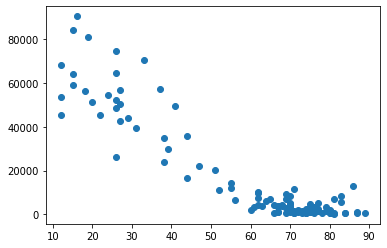

In [ ]:
#Visualisation before clustering
import matplotlib.pyplot as plt
plt.scatter(df['corruption_index'],df['annual_income'])	

In [ ]:
import numpy as np
np.sqrt(110)#110 is the total number of points
#No of cluster=k

10.488088481701515

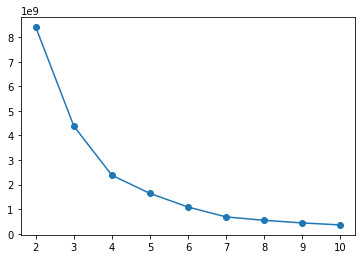

In [ ]:
#Find out the value of k
#1.Elbow method
from sklearn.cluster import KMeans
k=range(2,11)#k range is in b/w 2 and 11
sse=[]

for i in k:
  model_demo=KMeans(n_clusters=i,random_state=0)
  model_demo.fit(x)
  sse.append(model_demo.inertia_)
plt.scatter(k,sse)
plt.plot(k,sse)

2 Clusters ,Score=0.8250423417665396
3 Clusters ,Score=0.7873768660102557
4 Clusters ,Score=0.7445340205192341
5 Clusters ,Score=0.6727183336946292
6 Clusters ,Score=0.6372161082857853
7 Clusters ,Score=0.6546866089993955
8 Clusters ,Score=0.6456656559747936
9 Clusters ,Score=0.5859720648427018
10 Clusters ,Score=0.5947956746599683


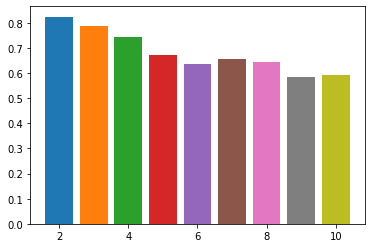

In [ ]:
#2.Silhouette score method to find out k value
from sklearn.metrics import silhouette_score
k=range(2,11)
for i in k:
  model_demo=KMeans(n_clusters=i,random_state=0)
  model_demo.fit(x)
  y_pred=model_demo.predict(x)
  print(f"{i} Clusters ,Score={silhouette_score(x,y_pred)}")
  plt.bar(i,silhouette_score(x,y_pred))

In [ ]:
#Apply clusterer
k=2
from sklearn.cluster import KMeans
model=KMeans(n_clusters=k,random_state=0)
model.fit(x)

KMeans(n_clusters=2, random_state=0)

In [ ]:
#Output prediction
y=model.predict(x)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
y.size

110

In [ ]:
x[y==1,0]
#The value of input when cluster 1 is selcted and column index 0 is selected

array([68110, 53660, 45340, 84090, 64010, 58890, 90360, 56370, 81110,
       51040, 45380, 54450, 52210, 48310, 64410, 74520, 56760, 50510,
       42620, 43880, 39410, 70430, 57120, 34980, 49560, 35710])

In [ ]:
np.unique(y,return_counts=True)

(array([0, 1], dtype=int32), array([84, 26]))

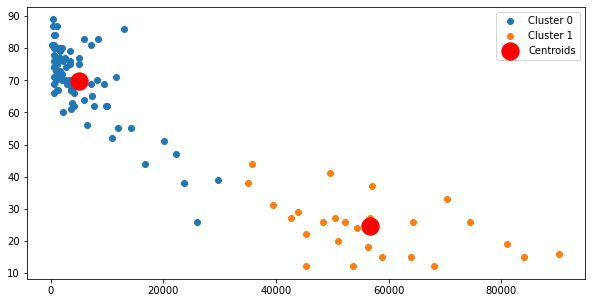

In [ ]:
#Final Visualisation after clustering
plt.figure(figsize=(10,5))
for i in range(k):
  plt.scatter(x[y==i,0],x[y==i,1],label=f'Cluster {i}')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.legend()
